In [1]:
# !pip install mord

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline
import matplotlib.pylab as plt

1. Upload, explore, clean, and preprocess data.

a. Why a logistic regression model may be used in this case? Why may you not apply a
multiple linear regression model in this case? Provide brief answers to both questions.

A logistic regression model may be used in this study since the outcome that we want to predict can be represented as a binary variable where FL_STATUS = 0 would be a flight that was delayed and FL_STATUS = 1 would be a flight that was on time. Logistic regression is specifically designed for binary classification tasks of Nominal categorical variable and estimates the probability of the binary outcome using the logit function.

Conversely, multiple linear regression is not appropriate for this case study. It predicts continuous numerical values that can fall outside the [0,1] range, making it unsuitable for binary classification tasks like predicting flight status.

b. Create a flight_df data frame by uploading the original data set into Python. Remove
‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame. Convert ‘CARRIER’ and
‘FL_STATUS’ into binary variables. This portion of part 1 will not be graded.

In [3]:
try:
    flight_df = pd.read_csv('FlightDelays.csv')
except:
    print("FlightDelays.csv is not in the present working directory")

In [4]:
# Remove ‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame.
flight_df = flight_df.drop(['DEST', 'ORIGIN'], axis=1)

In [5]:
# Convert ‘CARRIER’ and ‘FL_STATUS’ into category.
flight_df.CARRIER = flight_df.CARRIER.astype('category')
flight_df.FL_STATUS = flight_df.FL_STATUS.astype('category')

In [6]:
# Convert ‘CARRIER’ and ‘FL_STATUS’ into binary variables.
flight_df = pd.get_dummies(flight_df, columns=['CARRIER', 'FL_STATUS'], prefix_sep='_', drop_first=True)

In [7]:
flight_df.head()

,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,FL_STATUS_ontime
0,1455,1455,184,5935,0,4,1,0,0,0,1,0,0,0,1
1,1640,1640,213,6155,0,4,1,1,0,0,0,0,0,0,1
2,1245,1245,229,7208,0,4,1,1,0,0,0,0,0,0,1
3,1715,1709,229,7215,0,4,1,1,0,0,0,0,0,0,1
4,1039,1035,229,7792,0,4,1,1,0,0,0,0,0,0,1


c. Why does the output variable ‘FL_STATUS’ need to be converted into binary variables for
logistic regression? Briefly explain.

In logistic regression, the output variable 'FL_STATUS' needs to be converted into a binary variable to align with the model's design for binary classification tasks and does not understand what to do with variables represented as strings. Logistic regression estimates the probability that an instance belongs to one of two classes. By representing 'FL_STATUS' as binary where FL_STATUS=0 indicates a delayed flight and FL_STATUS=1 indicates an on-time flight, the model can effectively predict the probability of a flight status based on the predictor variables.

2. Develop a logistic regression model for the Flight Delays case.

a. Develop in Python the predictor variables (14 variables) and outcome variable
(‘FL_STATUS’) and partition the data set (70% for training and 30% for validation
partitions). Train a logistic regression model using LogisticRegression() with the training
data set and display in Python the model’s parameters (intercept and regression
coefficients). Provide these parameters in your report and also present the mathematical
equation of the trained logistic regression model.

In [8]:
predictors = ['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
              'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
               'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']
target = 'FL_STATUS_ontime'

X = flight_df[predictors]
y = flight_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
# train LogisticRegression model
lr = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
lr.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [10]:
print('Parameters of Multiple Predictors (14) Logistic Regression Model')
print('Intercept:', np.round(lr.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(lr.coef_[0], decimals=3)}, 
                   index=X.columns).transpose())

Parameters of Multiple Predictors (14) Logistic Regression Model
Intercept: 0.115
              SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  \
Coefficient:     0.025    -0.026     0.009     0.0   -0.753   0.069   -0.022   

              CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  \
Coefficient:       0.059         0.9      -1.004        0.37       0.031   

              CARRIER_UA  CARRIER_US  
Coefficient:       0.054       0.154  


Put in report: logit(p)= 0.115 + 0.025(SCH_TIME) − 0.026(DEP_TIME) + 0.009(DISTANCE) + 0(FL_NUM) − 0.753(WEATHER) + 0.069(WK_DAY) − 0.022(MTH_DAY) + 0.059(CARRIER_DH) + 0.9(CARRIER_DL) − 1.004(CARRIER_MQ) + 0.37(CARRIER_OH) + 0.031(CARRIER_RU) + 0.054(CARRIER_UA) + 0.154(CARRIER_US)

b. In Python, make predictions and identify probabilities p(0) and p(1) for the validation data
set. For the first 20 records in the validation data set, display a table that contains the
actual and predicted flight arrivalstatus, and probabilities p(0) and p(1). Present this table
in your report, and comment on the predicted vs. actual flight arrival status.

In [11]:
# make predictors and identify probabilities p(0) and p(1) for the validation data set
log_pred_single = lr.predict(valid_X)

In [12]:
# For the first 20 records in the validation data set, display a table that contains the actual and predicted 
# flight arrivalstatus, and probabilities p(0) and p(1)
log_prob_single = np.round(lr.predict_proba(valid_X), 
                           decimals=4)

# Create data frame to display simple logistic regression
# resuts for validation set. 
log_result_single = pd.DataFrame({'Actual': valid_y, 
                        'Classification': log_pred_single,     
                        'p(0)': [p[0] for p in log_prob_single],
                        'p(1)': [p[1] for p in log_prob_single],
                        })
print('Classification for Validation Partition')
print(log_result_single.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
1276       1               1  0.1506  0.8494
1446       1               1  0.0730  0.9270
335        1               1  0.1008  0.8992
1458       1               1  0.1206  0.8794
2038       1               1  0.0986  0.9014
1314       1               1  0.0811  0.9189
389        1               1  0.1300  0.8700
1639       1               1  0.1623  0.8377
2004       1               1  0.0967  0.9033
403        1               1  0.2379  0.7621
979        1               1  0.0615  0.9385
65         1               1  0.0743  0.9257
2105       1               1  0.1841  0.8159
1162       1               1  0.1365  0.8635
572        1               1  0.2444  0.7556
1026       0               1  0.0620  0.9380
1044       1               1  0.4702  0.5298
1846       0               1  0.4088  0.5912
1005       1               1  0.1422  0.8578
1677       1               1  0.0814  0.9186


Comment on the predicted vs. actual flight arrival status: Overall, the Logistic Regression model does well at predicting records with FL_STATUS = 1 (on time) but produces two false positives for FL_STATUS = 0 (delayed) by wrongly labeling the records as on time. It seems that the positive class (1) is more dominant than the negative class (0) in this validation partition. This imbalance is likely affecting the model's performance. 

c. Identify and display in Python confusion matrices for the training and validation
partitions. Present them in your report and comment on accuracy (misclassification) rate
for both partitions and explain if there is a possibility of overfitting.

In [13]:
# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, lr.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, lr.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8968)

       Prediction
Actual    0    1
     0  151  153
     1    6 1230

Validation Partition
Confusion Matrix (Accuracy 0.8971)

       Prediction
Actual   0   1
     0  58  66
     1   2 535


Explanation: The Logistic regression model with 14 predictors does well at obtaining an accuracy of 0.8968 on the training partition and 0.8971 on the validation partition. Being that the margin between these two accuracies is very minimal, we can conclude that there are no significant signs of overfitting on the training partition. 

d. Create and display in Python the Lift chart only for ‘delayed’ flight status. For that, use
p(0) for .sort_values() and p(0) in liftChart(). Also, use ncols=1 in plt.subplots() for a single
plot, and remove ax=axes[1] from liftChart(). Present this Lift chart in your report and
briefly explain what the chart demonstrates and what conclusion(s) can be made.

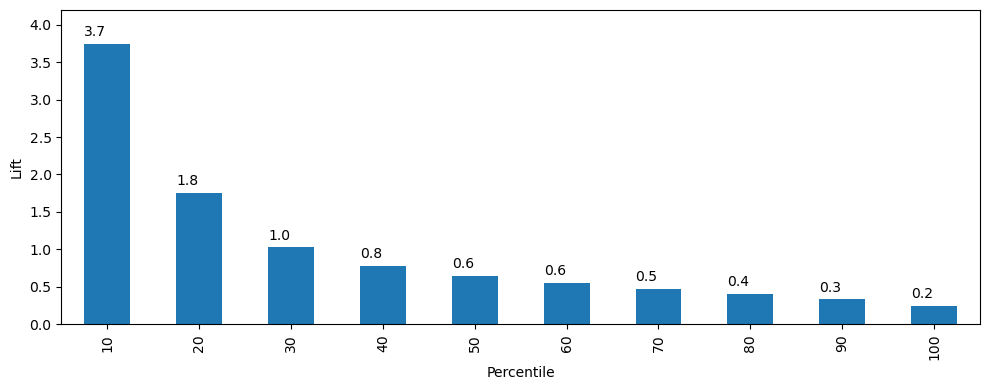

In [14]:
df = log_result_single.sort_values(by=['p(0)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
liftChart(df['p(0)'], title=False)
 
plt.tight_layout()
plt.show()

Briefly explain what the chart demonstrates and what conclusion(s) can be made: A decile lift chart shows how much better a logistic model is compared to random assignments. In the decile lift chart for delayed flight status we can see that the lift chart suggests that the model performs exceptionally well in the top 10% of the flights, with a lift value of 3.7, meaning it is 3.7 times better at identifying delayed flights compared to random selection. However, the model's performance deteriorates as we move down the deciles, becoming worse than random selection from the 7th decile onward. Performing worse than random selection past the 7th decile suggests that the predictive model needs further refinement and optimization to improve its effectiveness in identifying delayed flights. 

3. Compare results of logistic regression model vs. classification tree model for the same data set.

a. Present and compare in your report the validation confusion matrix for the logistic
regression model in 2c of this case versus the validation confusion matrix using the
GridSearchCV() algorithm for the classification tree in the previous case study. Using the
accuracy value (misclassification rate), which model would you recommend applying for
classification (prediction) of flight arrival status? Briefly explain your answer.

Explanation: Since the accuracy between the logistic regression model and the optimize classification model on the validation partition produces a small difference, we can say that either of these models would be good for predicting flight status. There is one trade-off to compare in this case and that is interpretability. If we want to have a model that can be explained through coefficients then using the logistic regression model would be preferred. The logistic regression model also does better at .. (finished in report) 

4. Extra Credit (Optional).

a. For the logistic regression in 2a, consider using the Backward Elimination algorithm to
reduce the number of predictors. In the train_model() function, consider model =
LogisticRegression(max_iter=500). Develop a logistic regression model based on the best
predictor variables from Backward Elimination and present the intercept and regression
coefficients (apply .coef_[0] )in your report. What specific predictors were removed from
this model?

In [15]:
from dmba import backward_elimination
from dmba import adjusted_r2_score, AIC_score, BIC_score

def train_model(variables):
    model = LogisticRegression(max_iter=550)
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: SCH_TIME, DEP_TIME, DISTANCE, FL_NUM, WEATHER, WK_DAY, MTH_DAY, CARRIER_DH, CARRIER_DL, CARRIER_MQ, CARRIER_OH, CARRIER_RU, CARRIER_UA, CARRIER_US
Start: score=936.60
Step: score=850.22, remove FL_NUM
Step: score=850.22, remove None

Best Variables from Backward Elimination Algorithm
['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'WEATHER', 'WK_DAY', 'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']


In [16]:
predictors = ['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'WEATHER', 'WK_DAY', 'MTH_DAY', 
              'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 
              'CARRIER_UA', 'CARRIER_US']

target = 'FL_STATUS_ontime'

X = flight_df[predictors]
y = flight_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
# train LogisticRegression model
lr_backwards = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
lr_backwards.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [18]:
print('Parameters of Backwards Elimination Logistic Regression Model')
print('Intercept:', np.round(lr_backwards.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(lr_backwards.coef_[0], decimals=3)}, 
                   index=X.columns).transpose())

Parameters of Backwards Elimination Logistic Regression Model
Intercept: 0.547
              SCH_TIME  DEP_TIME  DISTANCE  WEATHER  WK_DAY  MTH_DAY  \
Coefficient:     0.025    -0.025     0.008    -2.88   0.057    -0.02   

              CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  \
Coefficient:        0.32       0.909      -0.619       1.462        0.11   

              CARRIER_UA  CARRIER_US  
Coefficient:       0.288       0.246  


b. For the logistic regression model in 4a, identify and compare the confusion matrices for
training and validation partitions. Also, compare this validation confusion matrix with the
one from 2c, and explain if the logistic regression model based on Backward Elimination
can be potentially a good choice for classification of flight arrival status. 

In [19]:
# Identify  and display confusion matrix for training partition. 
print('Training Partition of Backwards Elimination Model')
classificationSummary(train_y, lr_backwards.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition of Backwards Elimination Model')
classificationSummary(valid_y, lr_backwards.predict(valid_X))

Training Partition of Backwards Elimination Model
Confusion Matrix (Accuracy 0.8994)

       Prediction
Actual    0    1
     0  150  154
     1    1 1235

Validation Partition of Backwards Elimination Model
Confusion Matrix (Accuracy 0.8986)

       Prediction
Actual   0   1
     0  58  66
     1   1 536
